In [14]:
#For this project I just wanted to do some basic linear regression.  I chose a subject that I 
#suspected would contain a lot of correlated columns: the Producer Price Index.  This is a lot
#like the Consumer Price Index, but instead of measuring the cost of goods bought by consumers, 
#it follows the cost of the raw goods that producers and manufacturers turn into end-use items.
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [3]:
#This data comes from FRED, Federal Reserve Economic Data.  It contains monthly Producer Price Index
#numbers by industry from December 2006 to April 2022.
ppi = pd.read_csv(r"C:\Users\danbr\OneDrive\Documents\Data Science\PPI data.csv")

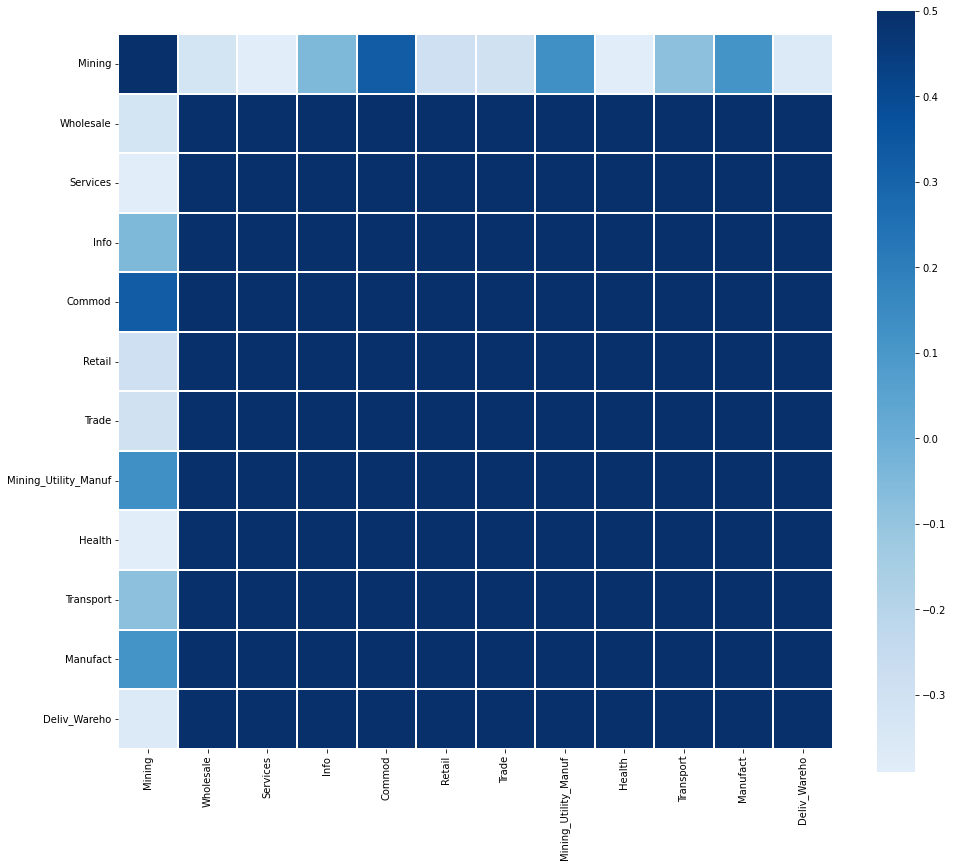

In [7]:
#First let's do a quick heatmap to see what, if any, correlations pop out.  We want to 
#see how these categories relate to each other, and this is a great way to visualize
#that.  The darker the blue, the stronger the correlation.
corr = ppi.corr()
plt.figure(figsize=(16, 14))
sns.heatmap(corr, vmax=0.5, center=0,
            square=True, linewidths=2, cmap='Blues')
plt.savefig("heatmap.png")
plt.show()

In [8]:
#Wow that's a lot of corellaiton.  Basically everything with the exception of mining is strongly 
#correlated.  That's interesting, because some of these categories don't seem to have much to do 
#with each other.  I'm going to single out Healthcare and Retail and take a look at how strongly
#they correlate:
print(ppi['Health'].corr(ppi['Retail']))

0.963476255875202


In [9]:
#Okay.  That is very strong.  I'm going to print the correlations in numbers for all the 
#categories.  This is basically the same thing as the heat map, but expressed as numbers
#instead of color.  It won't be as immediately expressive as a heat map is, but it will 
#give us more detailed information.  For example instead of knowing that a correlation is 
#"strong" we will be able to give it a specific number.
print(ppi.corr())

                        Mining  Wholesale  Services      Info    Commod  \
Mining                1.000000  -0.314071 -0.389584 -0.047097  0.328554   
Wholesale            -0.314071   1.000000  0.964314  0.864664  0.768543   
Services             -0.389584   0.964314  1.000000  0.784037  0.685522   
Info                 -0.047097   0.864664  0.784037  1.000000  0.809966   
Commod                0.328554   0.768543  0.685522  0.809966  1.000000   
Retail               -0.292584   0.984553  0.966800  0.874905  0.768230   
Trade                -0.300945   0.995749  0.969477  0.873071  0.772699   
Mining_Utility_Manuf  0.130323   0.875873  0.816228  0.854737  0.971146   
Health               -0.390010   0.973858  0.984999  0.813459  0.704105   
Transport            -0.080306   0.937356  0.905326  0.843517  0.889733   
Manufact              0.116228   0.877424  0.817685  0.851462  0.972470   
Deliv_Wareho         -0.362173   0.976209  0.986507  0.810482  0.723996   

                        

In [10]:
#Going back to Healthcare and Retail, I am keeping in mind that correlation only tells us how strong
#a relationship is.  It doesn't account for how impactful one number is on the other.  To do that 
#we'll need the R^2.  Now, the simplest way to do that is simply to take the correlation (R) and 
#square it, like so:
print(ppi['Health'].corr(ppi['Retail'])**2)

0.9282864956352977


In [19]:
#But I'm going to do this the long way, just to be thorough. Using sklearn we can run through the 
#numbers.

In [26]:
#I'll name the two columns as x and y.  I'm getting x and y into numpy arrays, and I make sure to reshape x into 2D otherwise the 
#model will not work
x= ppi[["Health"]].to_numpy().reshape((-1, 1))
y = ppi[["Retail"]].to_numpy()

In [29]:
#Creating an instance class for the regression model:
model = LinearRegression()

In [30]:
#Now we'll fit to the model:
model.fit(x, y)
LinearRegression()

LinearRegression()

In [35]:
#and now we'll get the R^2 based on the model:
r_2 = model.score(x, y)

In [34]:
#Lets take a look at the R^2
print(r_2)

0.9282864956352979


In [36]:
#Where have we seen that number before?  Yup.  It was the square of the correlation a few steps
#back. Like so:
print(ppi['Health'].corr(ppi['Retail'])**2)

0.9282864956352977


In [ ]:
#So if we want to save time in the future, we can just do the really quick correlation function 
#in pandas and square it to get the Coefficient of Determination, which is the more impressive-
#sounding name for the R^2.